In [1]:
import os
import cv2
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

###  Load ROI CSV File

In [7]:
DATA_DIR = "./data/processed_rois"
CSV_PATH = os.path.join(DATA_DIR, "roi_labels.csv")

if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"CSV file not found at {CSV_PATH}. Please run preprocessing first.")

df = pd.read_csv(CSV_PATH)
print(f"✅ Loaded metadata: {len(df)} ROI entries")
df.head()


✅ Loaded metadata: 10013 ROI entries


,path,class_id
0,data/processed_rois\class_3\group00041_00041_0...,3
1,data/processed_rois\class_2\group00041_00041_0...,2
2,data/processed_rois\class_4\group00041_00041_0...,4
3,data/processed_rois\class_4\group00041_00041_0...,4
4,data/processed_rois\class_5\group00041_00041_0...,5


### Check Class Distribution

C:\Users\singh\AppData\Local\Temp\ipykernel_26208\3739833762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class_id", data=df, palette="viridis")


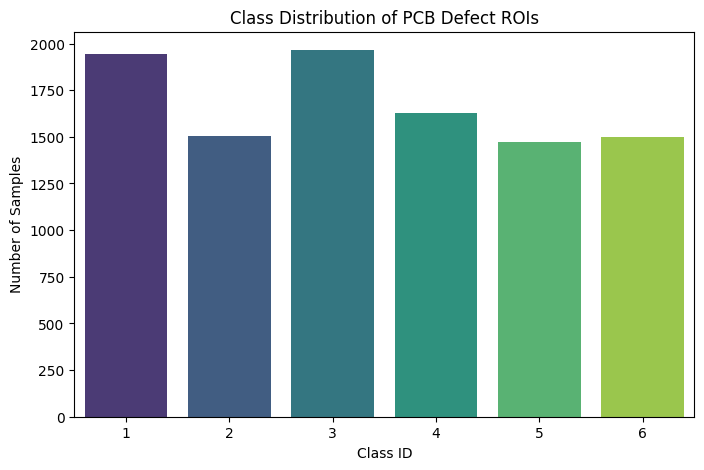

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x="class_id", data=df, palette="viridis")
plt.title("Class Distribution of PCB Defect ROIs")
plt.xlabel("Class ID")
plt.ylabel("Number of Samples")
plt.show()

### Verify File Existence & Integrity

In [9]:
print("📊 Class-wise sample counts:")
print(df["class_id"].value_counts().sort_index())

📊 Class-wise sample counts:
class_id
1    1942
2    1506
3    1965
4    1625
5    1474
6    1501
Name: count, dtype: int64


In [11]:
missing_files = []
broken_images = []

for idx, row in tqdm(df.iterrows(), total=len(df), desc="Verifying images"):
    path = row["path"]
    if not os.path.exists(path):
        missing_files.append(path)
        continue
    img = cv2.imread(path)
    if img is None or img.size == 0:
        broken_images.append(path)

print(f"\n🔍 Integrity check complete.")
print(f" - Missing files: {len(missing_files)}")
print(f" - Broken/corrupted images: {len(broken_images)}")

if missing_files:
    print("\n❌ Missing file examples:")
    for f in missing_files[:5]:
        print(" -", f)

if broken_images:
    print("\n❌ Broken image examples:")
    for f in broken_images[:5]:
        print(" -", f)
else:
    print("✅ All images loaded successfully!")

Verifying images: 100%|██████████| 10013/10013 [01:48<00:00, 92.56it/s]


🔍 Integrity check complete.
 - Missing files: 0
 - Broken/corrupted images: 0
✅ All images loaded successfully!


###  Display Random Samples from Each Class

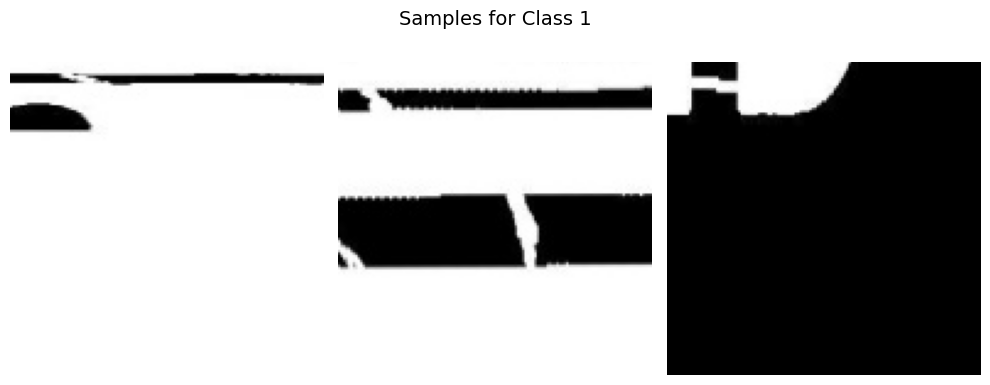

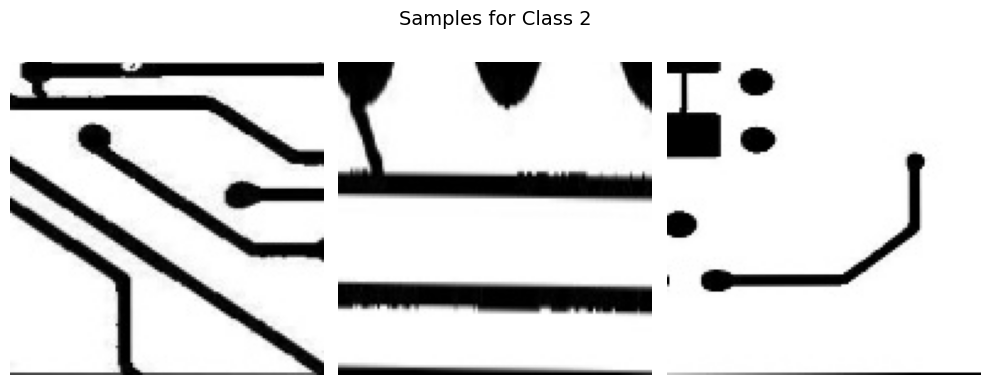

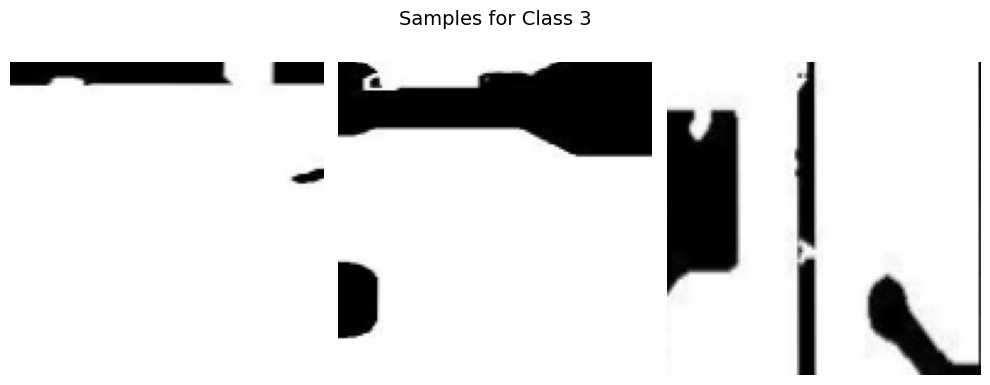

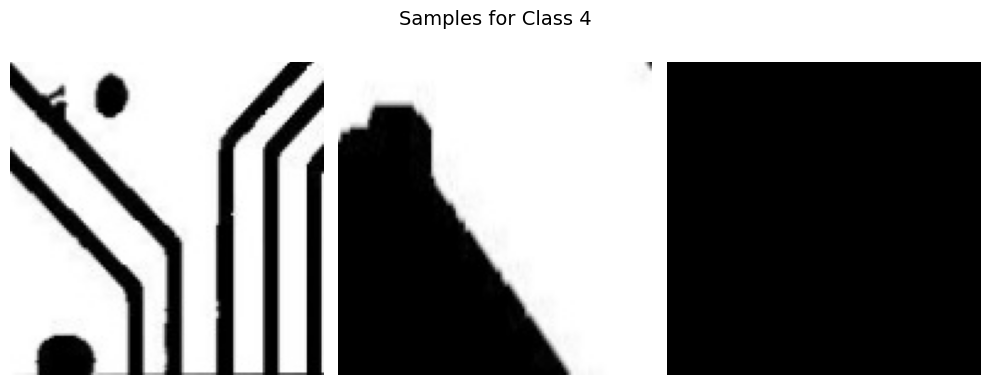

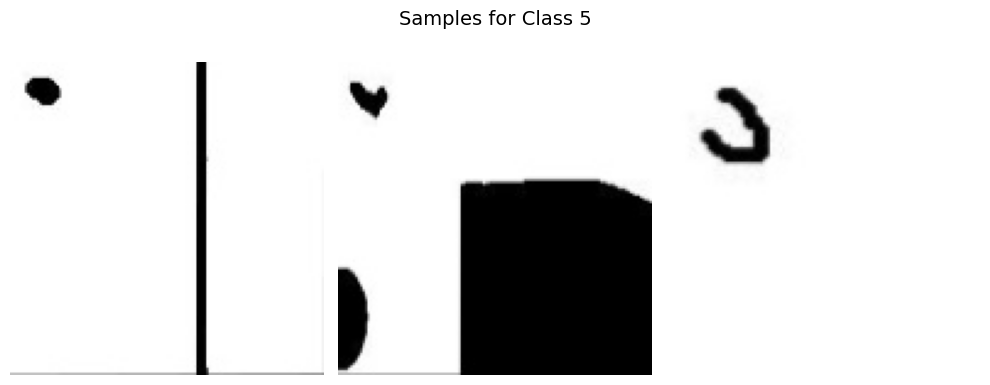

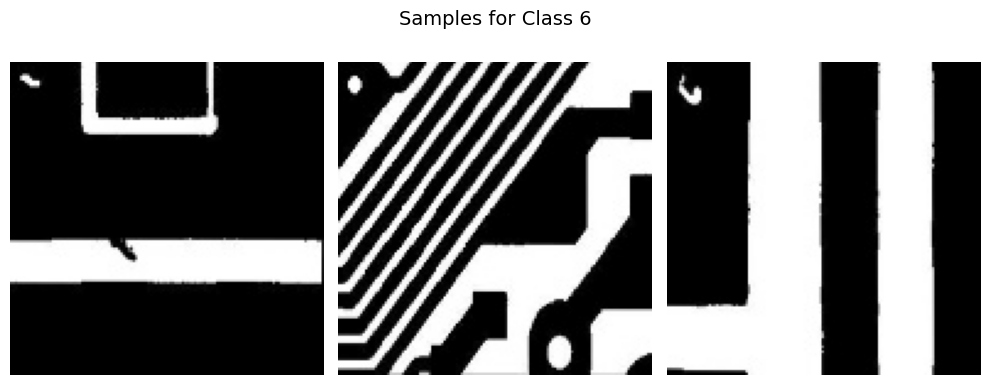

In [12]:
classes = sorted(df["class_id"].unique())

for cls in classes:
    subset = df[df["class_id"] == cls]
    if len(subset) == 0:
        continue
    sample_paths = random.sample(list(subset["path"]), min(3, len(subset)))

    fig, axes = plt.subplots(1, len(sample_paths), figsize=(10, 4))
    fig.suptitle(f"Samples for Class {cls}", fontsize=14)

    for i, path in enumerate(sample_paths):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

###  Image Size Statistics

Measuring image sizes: 100%|██████████| 10013/10013 [00:04<00:00, 2421.19it/s]


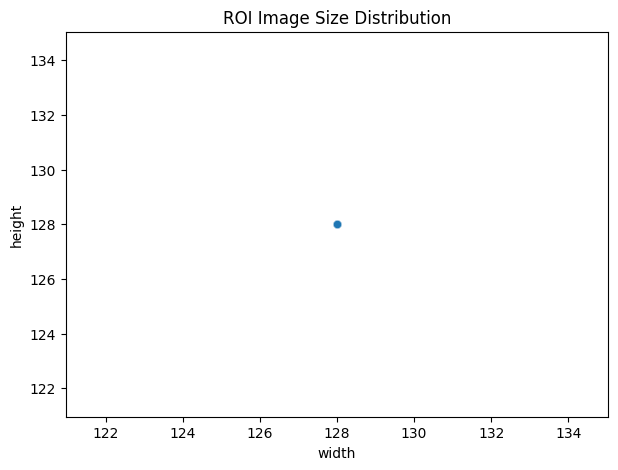

In [13]:
sizes = []
for p in tqdm(df["path"], desc="Measuring image sizes"):
    img = cv2.imread(p)
    if img is not None:
        h, w = img.shape[:2]
        sizes.append((w, h))

if sizes:
    sizes_df = pd.DataFrame(sizes, columns=["width", "height"])
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=sizes_df, x="width", y="height", alpha=0.3)
    plt.title("ROI Image Size Distribution")
    plt.show()
else:
    print("⚠️ No valid images found for size analysis.")

In [15]:
summary = df["class_id"].value_counts().sort_index().rename_axis("class_id").reset_index(name="count")
summary.to_csv(os.path.join(DATA_DIR, "roi_class_summary.csv"), index=False)
print(f" Summary saved: {os.path.join(DATA_DIR, 'roi_class_summary.csv')}")

print("\n EDA complete! Ready for training.")

 Summary saved: ./data/processed_rois\roi_class_summary.csv

 EDA complete! Ready for training.
